In [ ]:
# Checkout www.pygimli.org for more examples
%matplotlib inline



# Field data inversion ("Koenigsee")

This minimalistic example shows how the Refraction Manager can be used to invert
a field data set. Here, we consider the Koenigsee data set, which represents
classical refraction seismics data set with slightly heterogeneous overburden
and some high-velocity bedrock. The data file can be found in the `pyGIMLi
example data repository
<https://github.com/gimli-org/example-data/blob/master/traveltime/koenigsee.sgt>`_.


We import pyGIMLi and the refraction manager.



In [2]:
import pygimli as pg
from pygimli.physics import TravelTimeManager

The helper function `pg.getExampleFile` downloads the data set and saves it
into a temporary location. Printing the data reveals that there are 714 data
points using 63 sensors (shots and geophones) with the data columns s (shot),
g (geophone), and t (traveltime). By default, there is also a validity flag.



In [7]:
data = pg.getExampleFile("traveltime/koenigsee.sgt", load=True, verbose=True)
print(data)
data.save("Sample.dat")

10/08/22 - 01:36:47 - pyGIMLi - INFO - File already exists: C:\Users\braia\AppData\Local\Temp\gimli-org/example-data/traveltime/koenigsee.sgt


C:\Users\braia\AppData\Local\Temp\gimli-org/example-data/traveltime/koenigsee.sgt
Data: Sensors: 63 data: 714, nonzero entries: ['g', 's', 't', 'valid']


1

Let's have a look at the data in the form of traveltime curves.



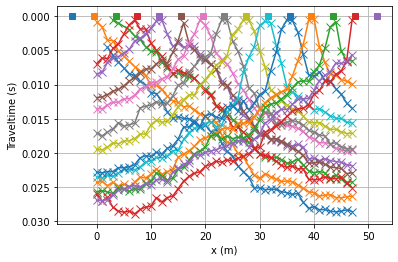

In [4]:
fig, ax = pg.plt.subplots()
pg.physics.traveltime.drawFirstPicks(ax, data)

We initialize the refraction manager.



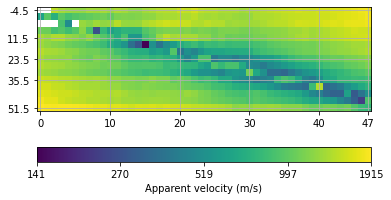

In [5]:
mgr = TravelTimeManager()

# Alternatively, one can plot a matrix plot of apparent velocities which is the
# more general function also making sense for crosshole data.

ax, cbar = mgr.showData(data)

Finally, we call the `invert` method and plot the result.The mesh is created
based on the sensor positions on-the-fly.



In [6]:
mgr.invert(data, secNodes=3, paraMaxCellSize=5.0,
           zWeight=0.2, vTop=500, vBottom=5000,
           verbose=1)

10/08/22 - 01:34:26 - pyGIMLi - INFO - Found 1 regions.
10/08/22 - 01:34:27 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\Users\braia\anaconda3\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:87)
DataContainer has no "err" values. Fallback to 3%
10/08/22 - 01:34:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
10/08/22 - 01:34:27 - pyGIMLi - INFO - Creating refined mesh (secnodes: 3) to solve forward task.
10/08/22 - 01:34:27 - pyGIMLi - INFO - Create gradient starting model. 500: 5000
10/08/22 - 01:34:28 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00188854 0.002      0.00178406 ... 0.00037301 0.00040087 0.00039237]
10/08/22 - 01:34:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x0000018E52477360>
Data transformation: <pgcore._pygimli_.RTrans object at 0x0000018E524774A0>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000018E551AB640>
min/max (data): 3.5e-04/0.03
min/max (error): 3%/3%
min/max (start model): 2.0e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... 

KeyboardInterrupt: 

Show result and fit of measured data and model response. You may want to save your results too.



In [ ]:
fig = mgr.showResultAndFit()
mgr.saveResult()

You can plot only the model and customize with a bunch of keywords



In [ ]:
ax, cbar = mgr.showResult(logScale=False, cMin=500, cMax=3000, cMap="plasma_r",
                          coverage=mgr.standardizedCoverage())
mgr.drawRayPaths(ax=ax, color="k", lw=0.3, alpha=0.5)

# mgr.coverage() yields the ray coverage in m and standardizedCoverage as 0/1

You can play around with the gradient starting model (`vTop` and `vBottom`
arguments) and the regularization strength `lam`. You can also customize the
mesh.

